In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
def preprocess_images(images):
    processed = []

    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (32, 32))
        normalized = resized / 255.0
        processed.append(normalized)

    return np.array(processed)

x_train_processed = preprocess_images(x_train)
x_test_processed = preprocess_images(x_test)

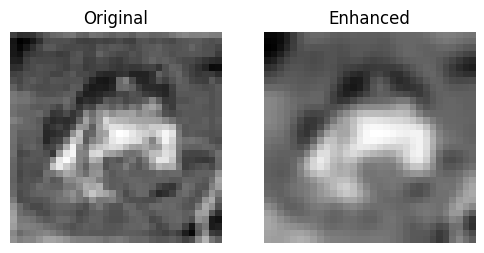

In [5]:
def enhance_image(image):
    bright = cv2.convertScaleAbs(image, alpha=1.2, beta=30)
    blurred = cv2.GaussianBlur(bright, (5, 5), 0)
    return blurred

original = cv2.cvtColor(x_train[0], cv2.COLOR_BGR2GRAY)
enhanced = enhance_image(original)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(original, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Enhanced")
plt.imshow(enhanced, cmap="gray")
plt.axis("off")

plt.show()

In [6]:
x_train_flat = x_train_processed.reshape(len(x_train_processed), -1)
x_test_flat = x_test_processed.reshape(len(x_test_processed), -1)

In [7]:
model = SVC(kernel='linear')
model.fit(x_train_flat, y_train.ravel())

SVC(kernel='linear')

In [8]:
y_pred = model.predict(x_test_flat)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.248
Confusion Matrix:
[[38  2  7 10  6  3  4 12 14  7]
 [ 4 33  4  4  3  6  7  4 11 13]
 [12  8 23 15 13 10 10  2  7  0]
 [ 7  7 13 19 11 11 11  7  7 10]
 [ 7  5 22 13 12  5 11  7  5  3]
 [10  5  9  7 14 13 16  6  4  2]
 [11 12 11 15 11 11 26  6  2  7]
 [12  5 14 11 11 14  5 20  5  5]
 [20  4 10  4  2  7  4  3 39 13]
 [ 9 29  3  8  2  3  3  7 20 25]]


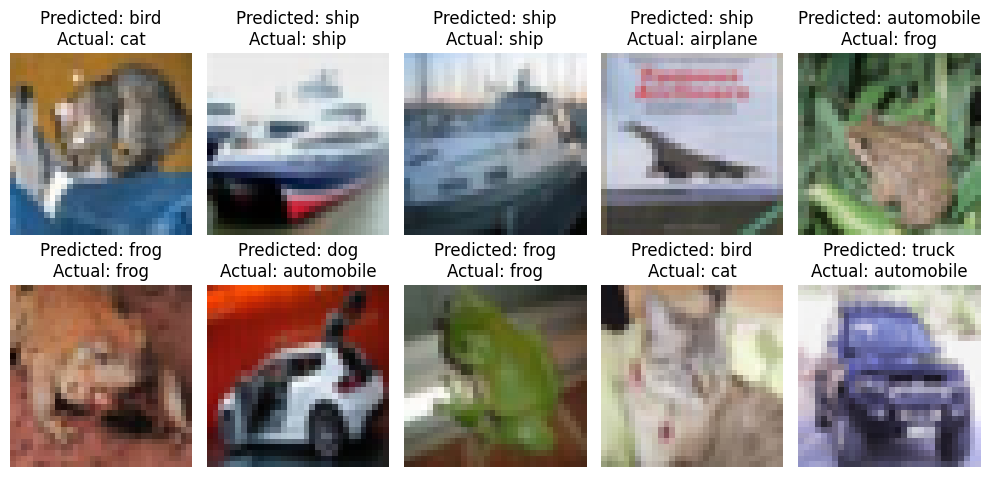

In [10]:
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[y_pred[i]]}\nActual: {class_names[y_test[i][0]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()